This is a machine learning model used to predict transaction fraud in a dataset provided
I have used two Ml methods : a. Logestic regression, b. decision Tree to check the accuracy


In [3]:
#importing the modules 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

#import dataset into dataframe 
fraud_dataset=pd.read_csv('C:/Users/laljm/Desktop/task/Fraud.csv')
fraud_dataset.head()#first five rows
fraud_dataset.tail()#last5

fraud_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
fraud_dataset.head()#first five rows

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
fraud_dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


Data cleaning including missing values, outliers and multi-collinearity.
 The missing values are checked by isnull()

We can see that oldbalanceOrg and newbalanceOrig have too high VIF thus they are highly correlated. Similarly oldbalanceDest and newbalanceDest. Also nameDest is connected to nameOrig.

In [8]:
#checking values are null/missing
fraud_dataset.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [9]:
fraud_dataset.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
#distribution of isFraud fraud or not 
fraud_dataset['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [11]:
#distribution of isFlaggedFraud fraud or not 
fraud_dataset['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [12]:
#dataset is highly unbalanced

In [13]:
#seperating the data for analysis in isFraud
non_fraud=fraud_dataset[fraud_dataset.isFraud==0]
fraud=fraud_dataset[fraud_dataset.isFraud==1]
print(non_fraud.shape)
print(fraud.shape)

(6354407, 11)
(8213, 11)


In [14]:
#stats of the data 
non_fraud.amount.describe()

count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

In [15]:
fraud.amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

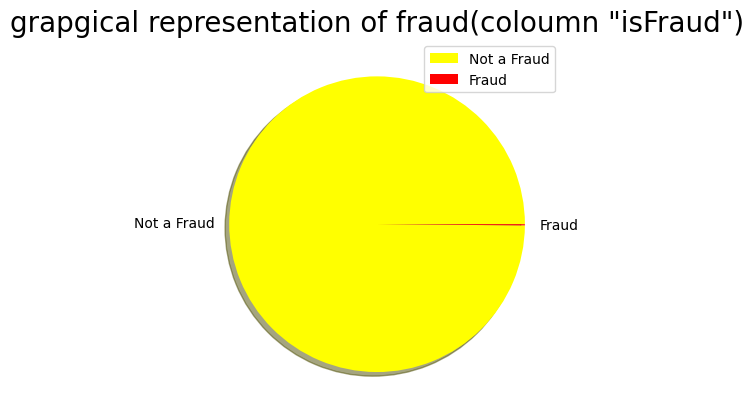

In [16]:
labels = ['Not a Fraud', 'Fraud']
colors = ['yellow', 'red']
size = [6354407, 8213]
plt.pie(size, labels = labels, colors = colors,  shadow = True)
plt.axis('off')
plt.title('grapgical representation of fraud(coloumn "isFraud")',fontsize = 20)
plt.legend()
plt.show()

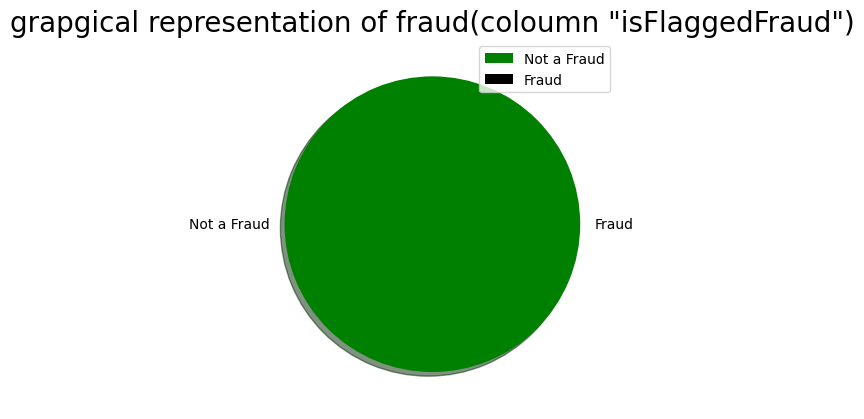

In [17]:
labels = ['Not a Fraud', 'Fraud']
colors = ['green', 'black']
size =  [6362604,16]
plt.pie(size, labels = labels, colors = colors,  shadow = True)
plt.axis('off')
plt.title('grapgical representation of fraud(coloumn "isFlaggedFraud")',fontsize = 20)
plt.legend()
plt.show()

In [18]:
fraud_dataset['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [19]:
a=fraud_dataset['step'].value_counts().nunique()
print("unique transactions are",a)

unique transactions are 428


My fraud detection model aims to identify fraudulent activities within a system by leveraging two primary machine learning techniques: logistic regression and decision trees. These methods offer complementary advantages, with logistic regression providing probabilistic outputs and decision trees offering interpretable rules for classification.

I have used lable encoder to convert all the values correspondint to the features with datatype "object" so that the logestic regression can work efficiently on the dataset

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in fraud_dataset.columns:
    if fraud_dataset[col].dtype == 'object':
        fraud_dataset[col] = label_encoder.fit_transform(fraud_dataset[col])
fraud_dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1,0
6362616,743,4,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1,0
6362617,743,1,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1,0
6362618,743,4,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,1,0


I have used principle component analysis to check which component had higher variance so our model gets higher accuracy 

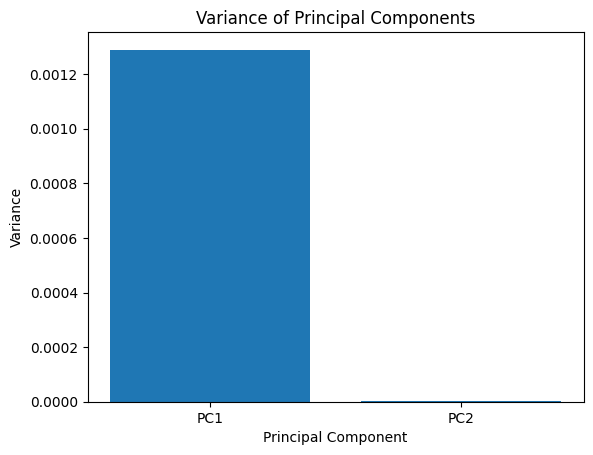

In [21]:

particular = fraud_dataset[['isFraud', 'isFlaggedFraud']]
pca = PCA(n_components=2)
pca.fit(particular)
X_pca = pca.transform(particular)
component_variances = pca.explained_variance_
X_pca
plt.bar(range(1, len(component_variances) + 1), component_variances, tick_label=['PC1', 'PC2'])
plt.xlabel('Principal Component')
plt.ylabel('Variance')
plt.title('Variance of Principal Components')
plt.show()

takind a smaple datatset for the regression to give a high accuracy score 

In [22]:
#sample dataset(balanced)
true_sample=non_fraud.sample(n=8213)



In [23]:
#combining the df

In [24]:
newFraudDataset=pd.concat([true_sample,fraud],axis=0)

In [25]:
newFraudDataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
979827,44,PAYMENT,17288.90,C1077030254,0.00,0.0,M1903494033,0.00,0.00,0,0
1485518,141,CASH_OUT,26603.44,C1671527472,0.00,0.0,C643996026,3196428.45,3223031.89,0,0
2851236,227,CASH_OUT,23169.79,C2000106317,0.00,0.0,C1262734283,119240.60,142410.39,0,0
636214,35,CASH_OUT,93819.30,C1172595886,0.00,0.0,C629318467,156917.52,250736.82,0,0
1868935,164,CASH_OUT,4186.55,C1882664004,0.00,0.0,C623222350,12920727.39,12924913.94,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [26]:
newFraudDataset['isFraud'].value_counts()

isFraud
0    8213
1    8213
Name: count, dtype: int64

using lable encoder

In [27]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in newFraudDataset.columns:
    if newFraudDataset[col].dtype == 'object':
        newFraudDataset[col] = label_encoder.fit_transform(newFraudDataset[col])
newFraudDataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
979827,44,3,17288.90,633,0.00,0.0,14810,0.00,0.00,0,0
1485518,141,1,26603.44,5784,0.00,0.0,11053,3196428.45,3223031.89,0,0
2851236,227,1,23169.79,8559,0.00,0.0,1770,119240.60,142410.39,0,0
636214,35,1,93819.30,1449,0.00,0.0,10948,156917.52,250736.82,0,0
1868935,164,1,4186.55,7572,0.00,0.0,10909,12920727.39,12924913.94,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,14617,339682.13,0.0,11998,0.00,339682.13,1,0
6362616,743,4,6311409.28,4501,6311409.28,0.0,6143,0.00,0.00,1,0
6362617,743,1,6311409.28,1368,6311409.28,0.0,2444,68488.84,6379898.11,1,0
6362618,743,4,850002.52,5897,850002.52,0.0,7513,0.00,0.00,1,0


In [28]:

X=newFraudDataset.drop(columns='isFraud')
Y=newFraudDataset['isFraud']
X

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
979827,44,3,17288.90,633,0.00,0.0,14810,0.00,0.00,0
1485518,141,1,26603.44,5784,0.00,0.0,11053,3196428.45,3223031.89,0
2851236,227,1,23169.79,8559,0.00,0.0,1770,119240.60,142410.39,0
636214,35,1,93819.30,1449,0.00,0.0,10948,156917.52,250736.82,0
1868935,164,1,4186.55,7572,0.00,0.0,10909,12920727.39,12924913.94,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,14617,339682.13,0.0,11998,0.00,339682.13,0
6362616,743,4,6311409.28,4501,6311409.28,0.0,6143,0.00,0.00,0
6362617,743,1,6311409.28,1368,6311409.28,0.0,2444,68488.84,6379898.11,0
6362618,743,4,850002.52,5897,850002.52,0.0,7513,0.00,0.00,0


In [29]:
Y


979827     0
1485518    0
2851236    0
636214     0
1868935    0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 16426, dtype: int64

In [30]:
#splitting the dataset


In [31]:
X_train, X_test, Y_train, Y_test= tts(X,Y,test_size=0.2,stratify=Y, random_state=2)

In [32]:
print(X.shape,X_test.shape,X_train.shape)

(16426, 10) (3286, 10) (13140, 10)


In [33]:
model = LogisticRegression(max_iter=16426)

In [34]:

#training the model
model.fit(X_train,Y_train)

LogisticRegression(max_iter=16426)

model evaluation on training data
by this we check the accuracy of the dataset on the training dataset

In [43]:
X_train_prediction=model.predict(X_train)
data_accuracy=accuracy_score(X_train_prediction,Y_train)
print("accuracy on training data",data_accuracy)

accuracy on training data 0.9341704718417048


model evaluation on test data 
 by this we check the accuracy of the dataset on the training dataset


In [2]:
X_test_prediction=model.predict(X_test)
data_accuracy=accuracy_score(X_test_prediction,Y_test)

print("accuracy on test  data",a)

NameError: name 'model' is not defined

copying the dataset for using it in decision tree 

In [52]:
new_df=fraud_dataset.copy()
new_df



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,757869,170136.00,160296.36,1662094,0.00,0.00,0,0
1,1,3,1864.28,2188998,21249.00,19384.72,1733924,0.00,0.00,0,0
2,1,4,181.00,1002156,181.00,0.00,439685,0.00,0.00,1,0
3,1,1,181.00,5828262,181.00,0.00,391696,21182.00,0.00,1,0
4,1,3,11668.14,3445981,41554.00,29885.86,828919,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,1,339682.13,5651847,339682.13,0.00,505863,0.00,339682.13,1,0
6362616,743,4,6311409.28,1737278,6311409.28,0.00,260949,0.00,0.00,1,0
6362617,743,1,6311409.28,533958,6311409.28,0.00,108224,68488.84,6379898.11,1,0
6362618,743,4,850002.52,2252932,850002.52,0.00,319713,0.00,0.00,1,0


In [54]:
from sklearn.preprocessing import LabelEncoder
objList = new_df.select_dtypes(include = "object").columns
print (objList)
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

Index([], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


In [55]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

In [56]:
(X_train, X_test, Y_train, Y_test) = tts(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 10)
Shape of X_test:  (1908786, 10)


In [57]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [58]:
print("Decision Tree Score: ", decision_tree_score)

Decision Tree Score:  99.96730906450487
